In [225]:
from bs4 import BeautifulSoup as soup 
import pandas as pd
import pymongo 
import datetime
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

TypeError: 'WordListCorpusReader' object is not callable

In [4]:
# Initialize Mongo 
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)
db = client.thousand_tabs
collection = db.job_detail
job_links_collection = db.job_links

In [6]:
data = pd.DataFrame(list(collection.find()))

In [7]:
link_list = []
for html in data.link_src:
    link_list.append(soup(html,'html.parser'))

In [214]:
job_summary = []
for idx in range(len(link_list)):
    for txt in link_list[idx].find_all('article','jobs-description__container jobs-description__container--condensed'):
        job_summary.append([txt.get_text().lower()])
        

In [215]:
job_summary[0]

["\n\n\n \nfocus gts is looking for a manufacturing and clinical supply data scientist for a contract position with a global company.\n\n position is on-site in thousand oaks california, and at this time, relocation is not provided.  \nthis person will build a wide-range of innovative data and analytics solutions, from descriptive to prescriptive, develop advanced analytical models, integrate data, derive insights, and automate and enhance processes  \nthe ideal candidate enjoys tackling challenges and excels at organizing information from numerous sources to provide well-constructed deliverables. \nmust have experience with interpreting and extracting meaning from different types of data sets. must have an understanding of biopharmaceuticals process and related unit operations, including supply chain operations. **expertise in python, sql, and ideally sas\xa0 \nlooking for someone with a can do attitude, willing to go outside of their comfort zone, great communication skills, and atte

In [140]:
skills_tst = pd.read_csv('../data/skills_indexed.csv')

In [216]:
skills_list = skills_tst.skills.unique()
skills_list  = [x.lower() for x in skills_list]
skills_list.remove('r')
skills_list.extend(['python', 'power bi', 'supply chain','excel', 'amazon web service' , 'amazon', 'apache', 
                    'artificial intelligence', 'ecommerce', 'extract, transform, load', 'google cloud platform', 
                    'gcp', 'looker', 'azure', 'model-view-viewmodel', 'multidimensional expressions', 
                    'natural language processing', 'sap', 'security information and event management', 'swift', 
                    'pytorch', 'vba', 'visual basic for applications', 'java', 'javascript', 'domo', 'd3.js',
                    'plot.ly', 'leaflet.js', 'matplotlib', 'seaborn', 'pandas', 'teradata', 'postgres'])
skills_list = [str(x) for x in skills_list]
skills_list.sort()

In [217]:
skills_list

['401(k) retirement savings plans',
 'a/b testing',
 'academic writing',
 'accounting',
 'active dod secret clearance',
 'adaptive insights',
 'adobe analytics',
 'advertising',
 'advertising campaigns',
 'advertising sales',
 'agile methodologies',
 'amazon',
 'amazon web service',
 'amazon web services (aws)',
 'american welding society standards',
 'amplitude analytics',
 'analytical skills',
 'analytics',
 'android',
 'annual reports',
 'anti-fraud',
 'apache',
 'apache kafka',
 'apache spark',
 'apache spark streaming',
 'apics',
 'apoptosis',
 'apparel',
 'applied mathematics',
 'applied physics',
 'artificial intelligence',
 'artificial intelligence (ai)',
 'asset management',
 'audience segmentation',
 'auto layout',
 'autoclave',
 'azure',
 'azure data factory',
 'azure databricks',
 "bachelor's degree",
 'bayesian statistics',
 'big data',
 'big data analytics',
 'bioengineering',
 'bioinformatics',
 'biopharmaceuticals',
 'biosafety',
 'blackline',
 'blackrock aladdin',
 'bl

In [218]:
job_skills = []
for idx, job in enumerate(job_summary):
    for skill in skills_list:
        if skill in job[0]:
            job_skills.append((idx, skill))
            
job_skills_df = pd.DataFrame(job_skills, columns=['job_id', 'skill'])
job_skills_df

,job_id,skill
0,0,analytical skills
1,0,analytics
2,0,bachelor's degree
3,0,biopharmaceuticals
4,0,communication
...,...,...
12205,801,sas
12206,801,sql
12207,801,statistical packages
12208,801,statistics


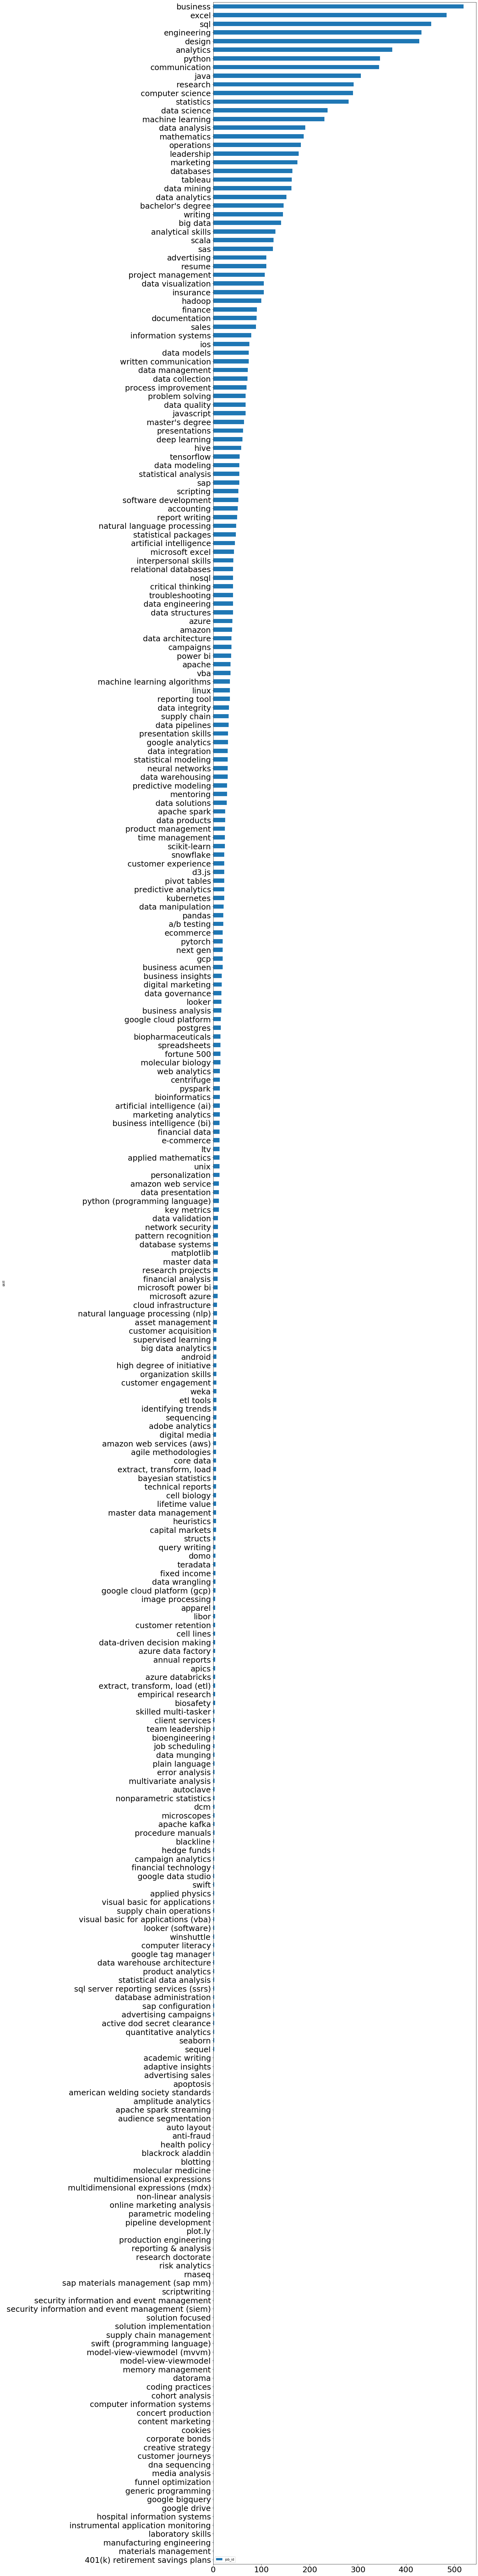

In [245]:
fig,ax = plt.subplots(figsize=(15,150))
ax.tick_params(axis='both',labelsize=25)
pd.DataFrame(job_skills_df.groupby(by='skill')['job_id'].count()).sort_values(by=['job_id'],ascending=True).plot(kind='barh',ax=ax)

In [249]:
all_skills = pd.DataFrame(job_skills_df.groupby(by='skill')['job_id'].count()).sort_values(by=['job_id'],ascending=True)

In [253]:
job_skills_df.to_csv('../data/all_skills.csv')

In [69]:
cvec = CountVectorizer(stop_words='english',ngram_range=(2,2))

In [70]:
term_mat = cvec.fit_transform(tmp)

In [71]:
term_df = pd.DataFrame(term_mat.toarray(),columns=cvec.get_feature_names())

In [72]:
term_sums = term_df.sum().sort_values(ascending=False)[:150]

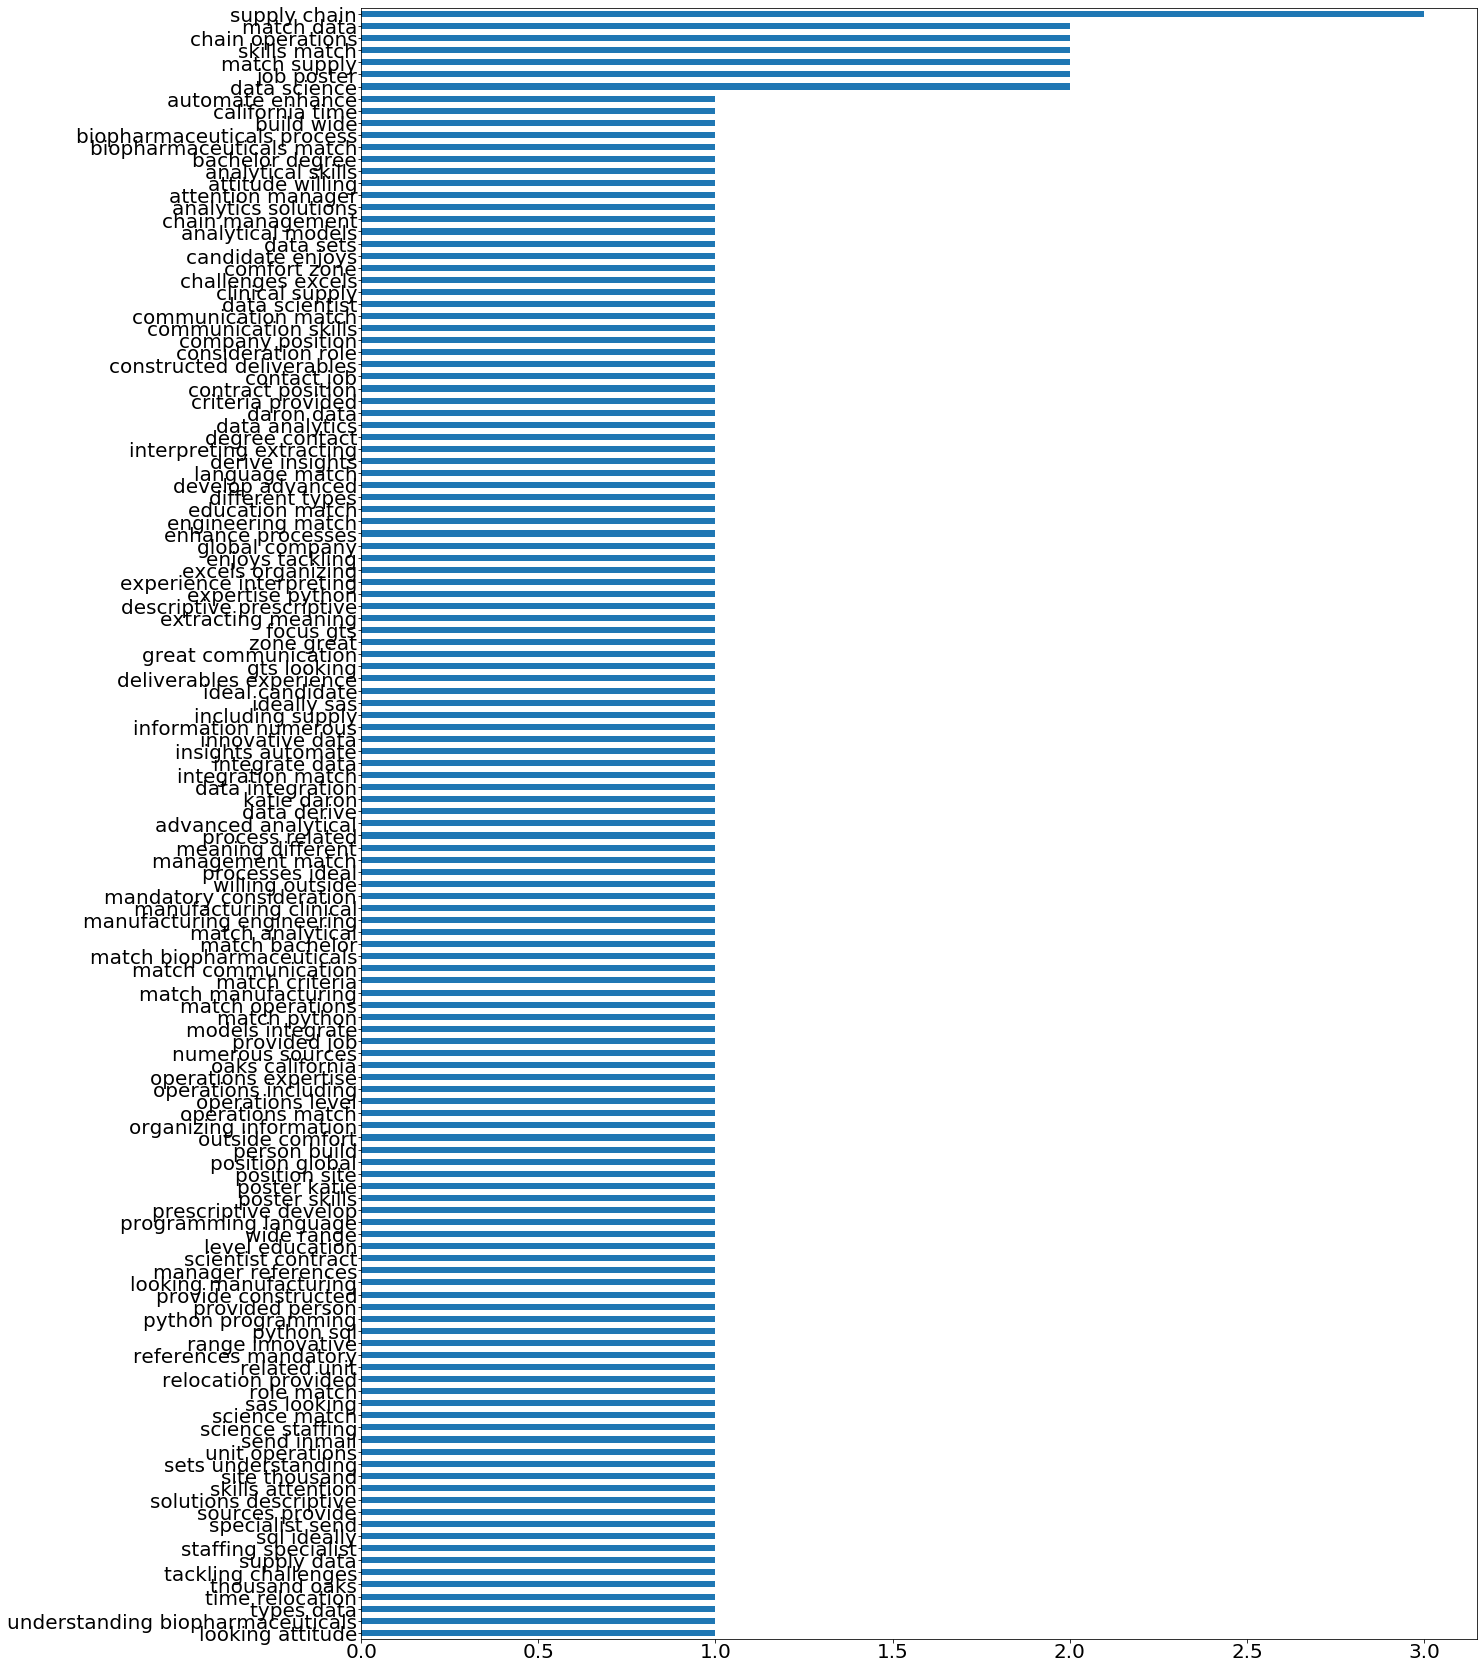

In [74]:
fig,ax = plt.subplots(figsize=(20,30))
ax.tick_params(axis='both',labelsize=20,pad=.50)
term_sums.sort_values().plot(kind='barh')


In [ ]:
for x in tmp:
    